# Analayse Shannon diversity index and Faith's phylogenetic index characteristics

This Jupyter Notebook contains main functions analyse alpha diversity dynamic behavior 

In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import acorr_ljungbox

import scipy.stats as stats
import matplotlib as mpl

In [5]:
mpl.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

In [10]:
def calculate_and_plot_acf(ts, subject):

    # Calculate acf and pacf functions
    acf_vals, acf_ci, acf_qstat, acf_pvalues = sm.tsa.stattools.acf(ts, nlags=70, fft=False, alpha=0.05, qstat=True)
    pacf_vals, pacf_ci = sm.tsa.stattools.pacf(ts, nlags=70, alpha=0.05)

    # Center the confidence intervals around zero
    centered_acf_ci = acf_ci - np.stack([acf_vals, acf_vals], axis=1)
    centered_pacf_ci = pacf_ci - np.stack([pacf_vals, pacf_vals], axis=1)

    # Plot 
    fig, axes = plt.subplots(1, 2, figsize = (10, 3))

    markerline1, stemlines1, baseline1 = axes[0].stem(acf_vals, linefmt='black', markerfmt='o')
    markerline1.set_markerfacecolor('black')
    markerline1.set_markersize(5)
    markerline1.set_markeredgewidth(0)
    stemlines1.set_linewidth(.7)
    baseline1.set_linewidth(3)
    axes[0].fill_between(range(0, 71), centered_acf_ci[:, 0], centered_acf_ci[:, 1], alpha=.2)
    axes[0].set_xlabel('lag [day]', size=14)
    axes[0].set_ylabel('ACF', size=14)
    axes[0].tick_params(axis='both', which='major', labelsize=10)

    markerline2, stemlines2, baseline2 = axes[1].stem(pacf_vals, linefmt='black', markerfmt='o')
    markerline2.set_markerfacecolor('black')
    markerline2.set_markersize(5)
    markerline2.set_markeredgewidth(0)
    stemlines2.set_linewidth(.7)
    baseline2.set_linewidth(3)
    axes[1].fill_between(range(0, 71), centered_pacf_ci[:, 0], centered_pacf_ci[:, 1], alpha=.2)
    axes[1].set_xlabel('lag [day]', size=14)
    axes[1].set_ylabel('PACF', size=14)
    axes[1].tick_params(axis='both', which='major', labelsize=10)
    
    #fig.suptitle(f'{subject}', size=12)
    plt.tight_layout()
    #plt.savefig(f'/storage/zkarwowska/microbiome-dynamics-preprint/plots/whole_community/autocorrelation/{subject}_acf_shannon.png', dpi=300)
    plt.show()

# I. Shannon diversity index

In [7]:
wd =  '/Users/zkarwowska/Desktop/dynamo/data/alpha_diversity/shannon/'

male_alpha_df = pd.read_csv(wd + 'male_shannon_entropy.csv')#.iloc[:150]
female_alpha_df = pd.read_csv(wd + 'female_shannon_entropy.csv')#.iloc[:150]
donorA_alpha_df = pd.read_csv(wd + 'donorA_shannon_entropy.csv')#.iloc[:150]
donorB_alpha_df = pd.read_csv(wd + 'donorB_shannon_entropy.csv')#.iloc[:150]

datasets = [male_alpha_df, female_alpha_df, donorA_alpha_df, donorB_alpha_df.iloc[:150]]
subjects = ['male', 'female', 'donorA', 'donorB']

## plot ACF and PACF

In [8]:
sns.set_style('white')

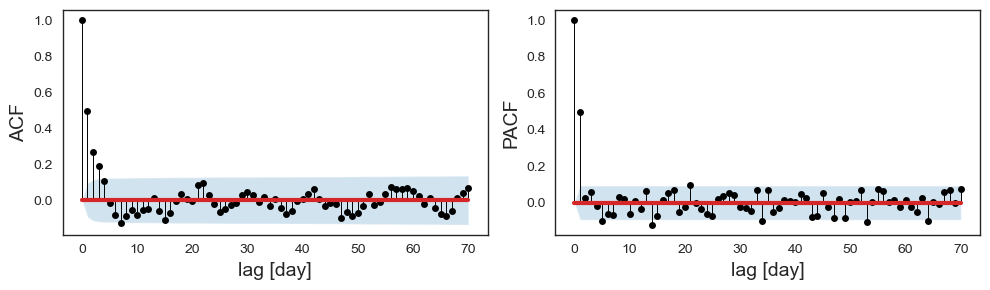

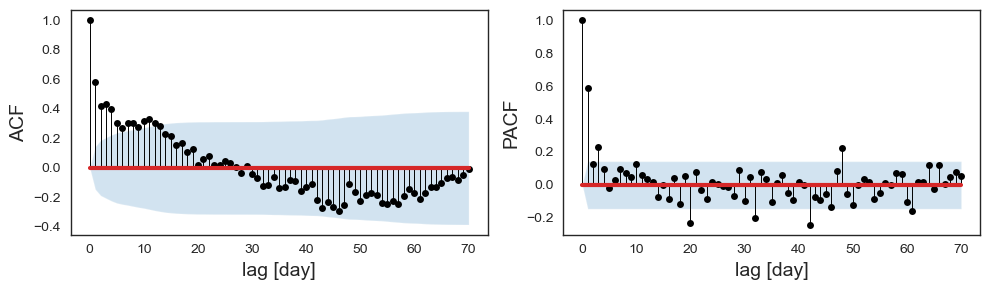

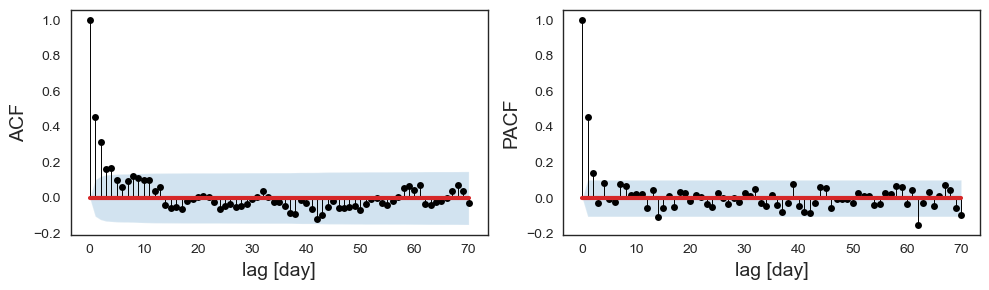

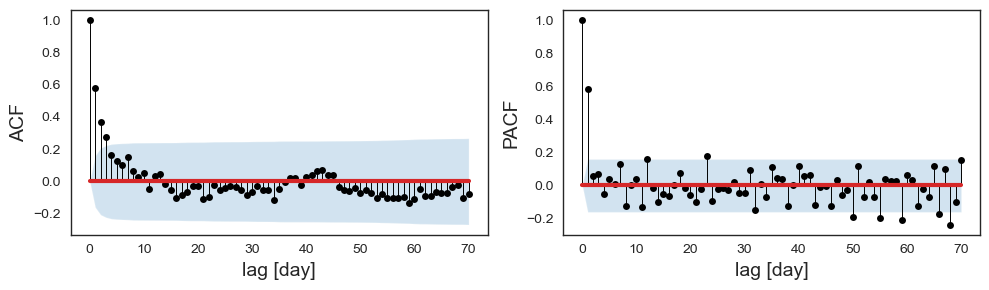

In [11]:
subjects = ['Male', 'Female', 'DonorA', 'DonorB']

for dataset, subject in zip(datasets, subjects):
    res_df = calculate_and_plot_acf(dataset, subject)

# II. Faith's PD index

In [14]:
#faiths
wd =  '/Users/zkarwowska/Desktop/dynamo/data/alpha_diversity/faiths_pd/'

male_alpha_df = pd.read_csv(wd + 'male_faiths_pd.csv').iloc[:150]
female_alpha_df = pd.read_csv(wd + 'female_faiths_pd.tsv', sep='\t', index_col = [0])#.iloc[:150]
donorA_alpha_df = pd.read_csv(wd + 'donorA_faiths_pd.tsv', sep='\t', index_col = [0])#.iloc[:150]
donorB_alpha_df = pd.read_csv(wd + 'donorB_faiths_pd.tsv', sep='\t', index_col = [0])#.iloc[:150]

datasets = [male_alpha_df, female_alpha_df, donorA_alpha_df, donorB_alpha_df.iloc[:150]]
subjects = ['male', 'female', 'donorA', 'donorB']

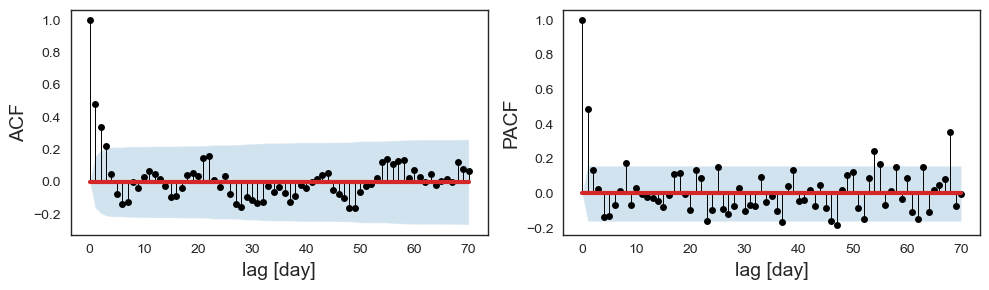

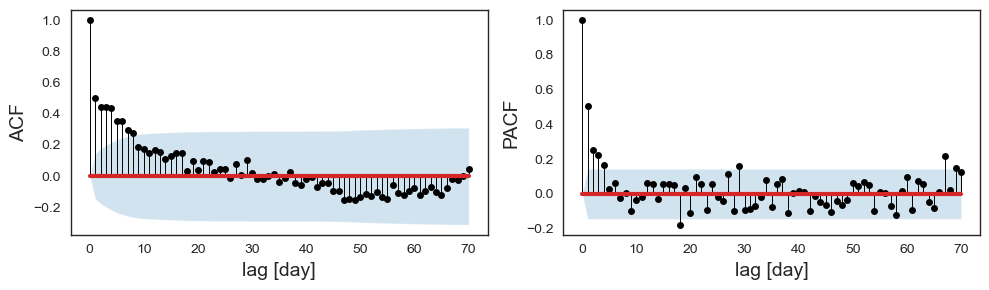

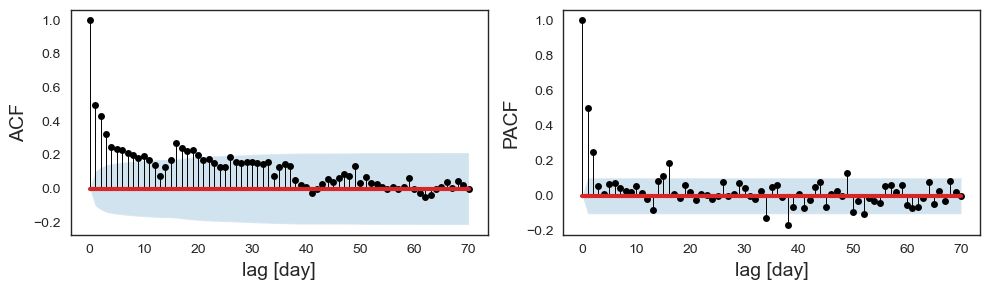

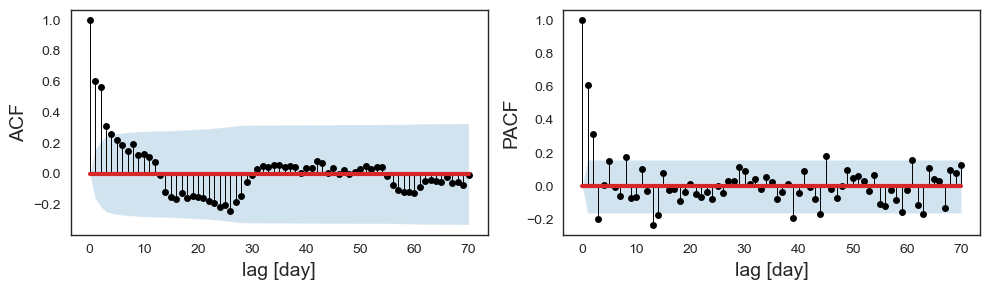

In [15]:
subjects = ['Male', 'Female', 'DonorA', 'DonorB']

for dataset, subject in zip(datasets, subjects):
    res_df = calculate_and_plot_acf(dataset, subject)